In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root

In [2]:
def fischer(kappa, cos_thetaP):
    '''vMF distribution'''
    return (kappa * np.exp(kappa * cos_thetaP)) / (4.*np.pi * np.sinh(kappa))

def fischer_int(kappa, cos_thetaP):
    '''Integral of vMF function over all angles'''
    return (1. - np.exp(-kappa * (1 - cos_thetaP))) / (1. - np.exp(-2.*kappa))

def fischer_int_eq_P(kappa, cos_thetaP, P):
    '''Equation to find roots for'''
    return P - fischer_int(kappa, cos_thetaP)


### Checking with plots

The plot below shows the probability distribution of cos(theta_P) with the vMF distribution.

This plot makes sense since if kappa -> 0, then the distribution is more uniform, which means that any angle between the true and detected vector is possible.
So as kappa increases, the detected vector should approach the true arrival direction, which means that their vectors align. This would mean that cos_thetaP = 1, which is what is shown below.

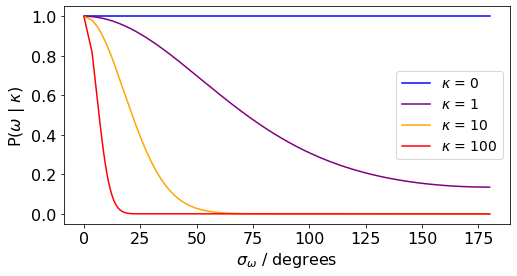

In [8]:
# check if we have the right plots
costhetaP_arr = np.linspace(-1, 1, 1000)

kappa_arr = np.array([1e-10, 1, 10, 100])


colors = ["b", "purple", "orange", "r"]

fig, ax = plt.subplots(figsize=(8,4))

for i, kappa in enumerate(kappa_arr):
    fischer_arr = fischer(kappa, costhetaP_arr)
    fischer_arr = fischer_arr / np.max(fischer(kappa, costhetaP_arr))
    ax.plot(np.rad2deg(np.arccos(costhetaP_arr)), fischer_arr, label="$\kappa$ = {:.0f}".format(kappa), color=colors[i])


ax.tick_params(axis='both', which='major', labelsize=16)
ax.tick_params(axis='both', which='minor', labelsize=16)
ax.set_xlabel(r"$\sigma_\omega$ / degrees", fontsize=16)
ax.set_ylabel(r"P($\hat{\omega}$ | $\kappa$, $\omega$)", fontsize=16)
ax.legend(fontsize=14);



fig.savefig("kappa_plot.png", dpi=300, bbox_inches="tight")

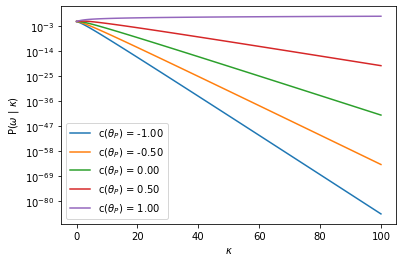

In [4]:
# check if we have the right plots


kappa_arr = np.logspace(np.log10(0.001), np.log10(100), 100)
costhetaP_arr = np.linspace(-1, 1, 5)

for costhetaP in costhetaP_arr:
    plt.semilogy(kappa_arr, fischer(kappa_arr, costhetaP), label=r"c($\theta_P$) = {:.2f}".format(costhetaP))

plt.xlabel(r"$\kappa$")
plt.ylabel(r"P($\omega$ | $\kappa$)")
plt.legend();

### Comparing between analytical and numerical results

The numerical results are solved by using cumtrapz to evaluate the cumulative distribution.

The analytical expression shows the integral of the prob. distribution **for some contour cone $\Omega$**. This means that the 1 sigma circle corresponds to integrating from $\cos\theta \in [1, \cos\theta_P]$ (monotonically decreasing) where $\theta_P$ is the angular radius where the probability is at 1 sigma (P = 0.683).

i.e. we are integrating from the top of the distribution ($\cos\theta = 1$) to some contour defined by the angular radius $\theta_P$

Thus we need to reverse the $\cos(\theta_P)$ array since we are integrating for $\theta \in [0, \theta_P]$, which corresponds to $\cos\theta \in [1, \cos\theta_P]$, and **not** $\cos\theta \in [-1, \cos\theta_P]$. This allows us to obtain the same formalism as the analytical expression.

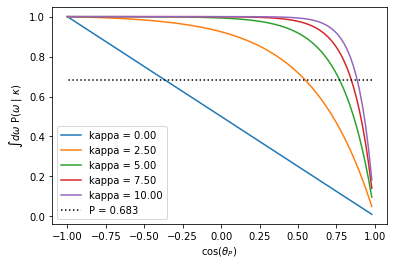

In [5]:
# now get the cumulative distribution function numerically


from scipy.integrate import cumtrapz

costhetaP_arr = np.linspace(-1, 1, 100)[::-1]
kappa_arr = np.linspace(0.0001, 10., 5)

vMF_cdfs = np.zeros((len(kappa_arr), len(costhetaP_arr)-1))
vMF_cdfs_analytical = np.zeros((len(kappa_arr), len(costhetaP_arr)-1))

for i, kappa in enumerate(kappa_arr):

    vMF_cdf = cumtrapz(fischer(kappa, costhetaP_arr), costhetaP_arr)
    vMF_cdf_analytical = fischer_int(kappa, costhetaP_arr[1:])

    vMF_cdfs[i, :] = vMF_cdf / vMF_cdf[-1]
    vMF_cdfs_analytical[i, :] = vMF_cdf_analytical

# plot results
for i, kappa in enumerate(kappa_arr):
    plt.plot(costhetaP_arr[1:], vMF_cdfs[i, :], label="kappa = {:.2f}".format(kappa))

P = 0.683

plt.plot(costhetaP_arr[1:], np.ones_like(costhetaP_arr[1:])*P, color="k", ls=":", label="P = {:.3f}".format(P))

plt.xlabel(r"cos($\theta_P$)")
plt.ylabel(r"$\int d\omega$ P($\omega$ | $\kappa$)")
plt.legend();


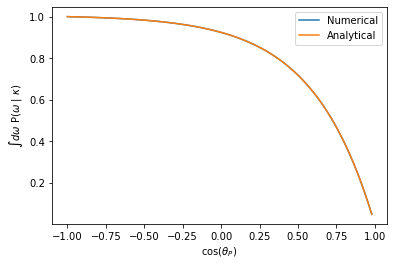

In [6]:
# compare between analytical and numerical results

kappa_index = 1

# plot results
plt.plot(costhetaP_arr[1:], vMF_cdfs[kappa_index, :], label="Numerical")
plt.plot(costhetaP_arr[1:], vMF_cdfs_analytical[kappa_index, :], label="Analytical")

plt.xlabel(r"cos($\theta_P$)")
plt.ylabel(r"$\int d\omega$ P($\omega$ | $\kappa$)")
plt.legend()

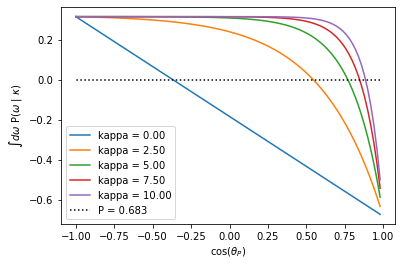

In [7]:
# plot analytical plots for different kappa

P = 0.683

# plot results
for i, kappa in enumerate(kappa_arr):
    plt.plot(costhetaP_arr[1:], vMF_cdfs_analytical[i, :] - P, label="kappa = {:.2f}".format(kappa))

plt.plot(costhetaP_arr[1:], np.zeros_like(costhetaP_arr[1:])*P, color="k", ls=":", label="P = {:.3f}".format(P))


plt.xlabel(r"cos($\theta_P$)")
plt.ylabel(r"$\int d\omega$ P($\omega$ | $\kappa$)")
plt.legend()

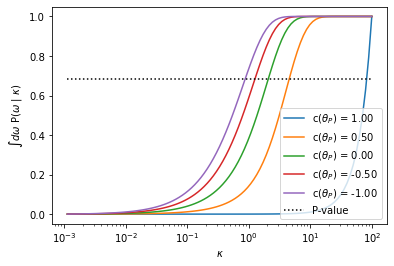

In [8]:
# now get the cumulative distribution function numerically as a function of kappa


from scipy.integrate import cumtrapz

costhetaP_arr = np.linspace(-1, 1, 5)[::-1]

kappa_arr = np.logspace(np.log10(0.001), np.log10(100), 100)

vMF_cdfs = np.zeros((len(kappa_arr) - 1, len(costhetaP_arr)))
vMF_cdfs_analytical = np.zeros((len(kappa_arr) - 1, len(costhetaP_arr)))

for i, costhetaP in enumerate(costhetaP_arr):

    vMF_cdf = cumtrapz(fischer(kappa_arr, costhetaP), kappa_arr)
    vMF_cdf_analytical = fischer_int(kappa_arr[1:], costhetaP)

    vMF_cdfs[:, i] = vMF_cdf / vMF_cdf[-1]
    vMF_cdfs_analytical[:, i] = vMF_cdf_analytical

# plot results
for i, costhetaP in enumerate(costhetaP_arr):
    plt.semilogx(kappa_arr[1:], vMF_cdfs[:, i], label=r"c($\theta_P$) = {:.2f}".format(costhetaP))

P = 0.683

plt.plot(kappa_arr[1:], np.ones_like(kappa_arr[1:])*P, color="k", ls=":", label="P-value")

plt.xlabel(r"$\kappa$")
plt.ylabel(r"$\int d\omega$ P($\omega$ | $\kappa$)")
plt.legend();


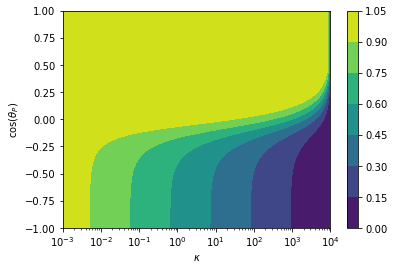

In [9]:
# plot 2d histogram of probability distribution

from matplotlib import ticker

costhetaP_arr = np.linspace(-1, 1, 100)
kappa_arr = np.logspace(np.log10(0.001), np.log10(10000), 100)

vmf_2d = np.zeros((len(kappa_arr), len(costhetaP_arr)))

for i, kappa in enumerate(kappa_arr):
    vmf_2d[i, :] = fischer_int(kappa, costhetaP_arr)

K, CTP = np.meshgrid(kappa_arr, costhetaP_arr)

fig, ax = plt.subplots()
cs = ax.contourf(K, CTP, vmf_2d)
ax.set_xscale("log")
ax.set_yscale("linear")

ax.set_xlabel(r"$\kappa$")
ax.set_ylabel(r"cos($\theta_P$)")

cbar = fig.colorbar(cs)


In [33]:
def fischer(kappa, cos_thetaP):
    '''vMF distribution'''
    return (kappa * np.exp(kappa * cos_thetaP)) / (4.*np.pi * np.sinh(kappa))

def fischer_int(kappa, cos_thetaP):
    '''Integral of vMF function over all angles'''
    return (1. - np.exp(-kappa * (1 - cos_thetaP))) / (1. - np.exp(-2.*kappa))

def fischer_int_eq_P(kappa, cos_thetaP, P):
    '''Equation to find roots for'''
    return fischer_int(kappa, cos_thetaP) - P

def log_fischer(kappa, cos_thetaP):
    '''vMF distribution in log scale (base e)'''
    return np.log(kappa) - np.log(2*np.pi) - kappa * (1 - cos_thetaP)


kappa =  2610.200883176135


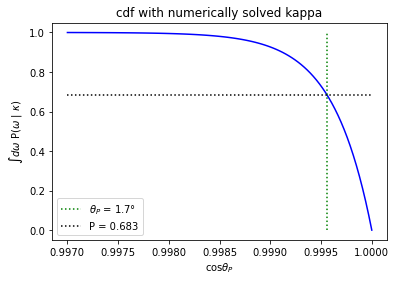

In [18]:
# evaluate kappa for fixed cos_thetaP, P
ang_err = 1.7   # angular reconstruction error 
cos_thetaP = np.cos(np.deg2rad(ang_err))
P = 0.683

sol = root(fischer_int_eq_P, x0=1, args=(cos_thetaP, P))
# print(sol)   # check solution

kappa_sol = sol.x[0]
print("kappa = ", kappa_sol)

# plot to check
fig, ax = plt.subplots()

costhetaP_arr = np.linspace(0.997, 1, 100)
ax.plot(costhetaP_arr, fischer_int(kappa_sol, costhetaP_arr), color="b")

ax.plot(np.ones_like(costhetaP_arr) * cos_thetaP, np.linspace(0., np.max(fischer_int(kappa, costhetaP_arr)), 100), ls=":", color="g", label=r"$\theta_P$ = {:.1f}$\degree$".format(ang_err))
ax.plot(costhetaP_arr, np.ones_like(costhetaP_arr) * P, ls=":", color="k", label="P = {:.3f}".format(P))
ax.set_xlabel(r"$\cos\theta_P$")
ax.set_ylabel(r"$\int d\omega$ P($\omega$ | $\kappa$)")
ax.set_title("cdf with numerically solved kappa")
ax.legend();

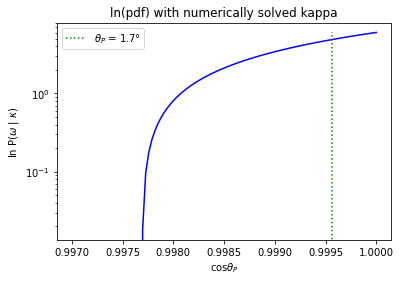

In [19]:
fig, ax = plt.subplots()

ang_err = 1.7   # angular reconstruction error 
cos_thetaP = np.cos(np.deg2rad(ang_err))

costhetaP_arr = np.linspace(0.997, 1, 100)
ax.semilogy(costhetaP_arr, log_fischer(kappa_sol, costhetaP_arr), color="b")

ax.plot(np.ones_like(costhetaP_arr) * cos_thetaP, np.linspace(0., np.max(log_fischer(kappa_sol, costhetaP_arr)), 100), ls=":", color="g", label=r"$\theta_P$ = {:.1f}$\degree$".format(ang_err))
# ax.plot(costhetaP_arr, np.ones_like(costhetaP_arr) * P, ls=":", color="k", label="P = {:.3f}".format(P))
ax.set_xlabel(r"$\cos\theta_P$")
ax.set_ylabel(r"$\ln$ P($\omega$ | $\kappa$)")
ax.set_title("ln(pdf) with numerically solved kappa")
ax.legend();

In [20]:
# compare with approximated formulat provided in Capel and Mortlock, 2019
# which is also provided in the footnote of Soiaporn

def kappa_approx_soiaporn(theta_P):
    '''Note: theta_P must be in degrees'''
    return (86.9 / theta_P)**2.

def kappa_approx_capel(theta_P):
    '''Note: theta_P must be in degrees'''
    return 7552 / theta_P**2.

kappa_soiaporn = kappa_approx_soiaporn(ang_err)
kappa_capel = kappa_approx_capel(ang_err)

print("Approximated kappa from Soiaporn paper = ", kappa_soiaporn)
print("Approximated kappa from Capel paper = ", kappa_capel)
print("Kappa evaluated numerically = ", kappa_sol)

print("Residual between soiaporn kappa and numerical: ", np.abs(kappa_soiaporn - kappa_sol))

Approximated kappa from Soiaporn paper =  2613.0138408304506
Approximated kappa from Capel paper =  2613.1487889273358
Kappa evaluated numerically =  2610.200883176135
Residual between soiaporn kappa and numerical:  2.8129576543155963


In [21]:
ls ../../

checks/  figures/      legacy/     paper_1/         run.py            stan/
data/    fit_model.py  notebooks/  plot_results.py  simulate_data.py  tables/


In [22]:
import h5py

In [34]:
# now evaluate for different dot products of uhecr and sources
import os
from fancy import Data
from fancy.detector.TA2015 import detector_properties

data_path = "../../data"
# os.path.exists(data_path)

source_file = os.path.join(data_path, "sourcedata.h5")
uhecr_file = os.path.join(data_path, "UHECRdata.h5")

data = Data()
data.add_source(source_file, "SBG_23")
data.add_uhecr(uhecr_file, "TA2015")
data.add_detector(detector_properties)

source_uvs = data.source.unit_vector
uhecr_uvs = np.array(data.uhecr.unit_vector)


print(source_uvs[0])
cos_thetaPs = np.zeros((len(source_uvs), len(uhecr_uvs)))
for i, source_uv in enumerate(source_uvs):
    cos_thetaPs[i, :] = np.dot(source_uv, uhecr_uvs.T)

P = 0.683
kappa_arr = np.zeros(len(cos_thetaPs))
for i, cos_thetaP in enumerate(cos_thetaPs):
    sol = root(fischer_int_eq_P, x0=np.ones(cos_thetaP.shape[0]), args=(cos_thetaP, P))
    kappa_arr[i] = sol.x[0]




[ 0.88477346  0.18625839 -0.42718116]


In [35]:
kappa_arr

array([ 0.70811096,  2.33902309,  2.92226715, -0.09313139,  1.        ,
        0.61930201,  3.75774788,  0.88033492,  1.47779907,  1.46913427,
        0.97226845,  0.88329676,  2.90623877,  1.96102331,  1.93075278,
        2.44511282,  2.71728024,  2.61241509,  1.70931412,  1.82136775,
       -0.39041319, -2.73355663,  1.2318164 ])